# EDA

Company X manages the men's top professional basketball division
of the American league system.The dataset contains information on all the teams
that have participated in all the past tournaments. It has data about how many
baskets each team scored, conceded, how many times they came within the first
2 positions,how many tournaments they have qualified, their best position in the
past, etc.

• ATTRIBUTE INFORMATION:
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the
tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments
so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the
tournaments played.

• PROJECT OBJECTIVE: Company’s management wants to invest on proposals
on managing some of the best teams in the league. The analytics department
has been assigned with a task of creating a report on the performance shown by
6
the teams. Some of the older teams are already in contract with competitors.
Hence Company X wants to understand which teams they can approach which
will be a deal win for them.

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import statistics as st

Importing the datset

In [125]:
#Load the Dataset
df = pd.read_csv('C:\\Users\\wajid\\Downloads\\project 1 (4)\\project 1\\Basketball.csv')

Understanding the dataset

In [3]:
# Check the head of the dataset
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [126]:
# Check the tail of the dataset
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [127]:
#To take a closer look at the data, pandas library provides “.head()” function which returns first five observations and “.tail()” function which returns last five observations of the data set.

In [4]:
#Inspect the Dataset
# Get the shape and size of the dataset
df.shape

(61, 13)

In [ ]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
df.info()

In [7]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [8]:
df.isna().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

Observations

This dataset contains 61 observations with 13 independant attribues
All columns are of type string where as only Tournament and HighestPositionHeld are of type integer
There are No null/missing values present in the dataset

Data Cleaning
We can't conclude and derive relationships with Exploratory Data Analysis (EDA) when some of the data is missing/encoded. So we have to find a solution to clean it up before taking it into consideration.

The easiest option could be to eliminate all those team's record with null or missing values present in any of the attributes, but in this way we would end up eliminating a lot of other important data.

Analysing the dataset, it implies that all of the attributes are quantitative except for the TeamLaunch, which represents a year So, our approach is to impute 0 in place of all the null or missing fields. TeamLaunch attribute also needs to be cleaned to contain only a particular year of launch.

Convert data types of the columns for easier mathematical operations

In [128]:
df['TeamLaunch'] = df['TeamLaunch'].apply(lambda year: str(year)[:4])
df['TeamLaunch'] = df['TeamLaunch'].astype(int)

In [129]:
df['Tournament'] = df['Tournament'].astype(int)
df['Score'] = df['Score'].replace(('-',' '),'0').astype(int)
df['PlayedGames'] = df['PlayedGames'].replace(('-',' '),'0').astype(int)
df['WonGames'] = df['WonGames'].replace(('-',' '),'0').astype(int)
df['DrawnGames'] = df['DrawnGames'].replace(('-',' '),'0').astype(int)
df['LostGames'] = df['LostGames'].replace(('-',' '),'0').astype(int)
df['BasketScored'] = df['BasketScored'].replace(('-',' '),'0').astype(int)
df['BasketGiven'] = df['BasketGiven'].replace(('-',' '),'0').astype(int)
df['TournamentChampion'] = df['TournamentChampion'].replace(('-',' '),'0').astype(object)
df['Runner-up'] = df['Runner-up'].replace(('-',' '),'0').astype(object)
df['HighestPositionHeld'] = df['HighestPositionHeld'].replace(('-',' '),'0').astype(object)

In [49]:
#revised info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 6 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 47 non-null     object
 1   Tournament           47 non-null     int32 
 2   Score                47 non-null     int32 
 3   PlayedGames          47 non-null     int32 
 4   WonGames             47 non-null     int32 
 5   DrawnGames           47 non-null     int32 
 6   LostGames            47 non-null     int32 
 7   BasketScored         47 non-null     int32 
 8   BasketGiven          47 non-null     int32 
 9   TournamentChampion   47 non-null     object
 10  Runner-up            47 non-null     object
 11  TeamLaunch           47 non-null     object
 12  HighestPositionHeld  47 non-null     object
dtypes: int32(8), object(5)
memory usage: 3.7+ KB


Check the outliers

<AxesSubplot:>

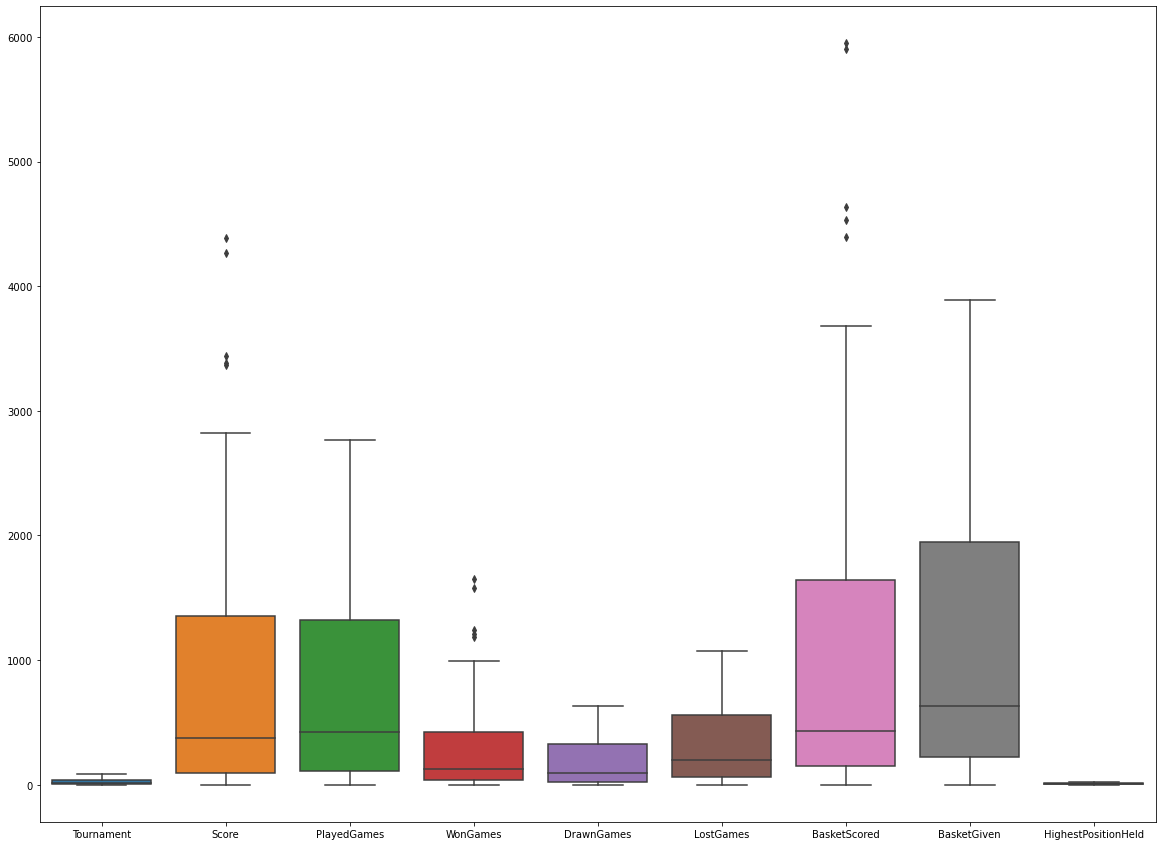

In [79]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

The Variables such as score,played games,wongames,Basket score contains outliers which needed to be treated to avoid anamolies. Here, The box plot helps us to find the outliers.

Outlier treatment

Replace outliers with the mean or median (whichever better represents for your data) for that variable to avoid a missing data point.

Here we are using median function to treat the outliers by replacing the values in the variables such as Score,Woin Games and BasketScores, since using mean is highly susceptible to outliers.

In [130]:
median = df['Score'].median()
df['Score'] = np.where(df['Score'] > median, median, df['Score'])

In [131]:
median1 = df['WonGames'].median()
df['WonGames'] = np.where(df['Score'] > median1, median1, df['WonGames'])

In [132]:
median2 = df['BasketScored'].median()
df['BasketScored'] = np.where(df['BasketScored'] > median2, median2, df['BasketScored'])

After Outlier Treatment

<AxesSubplot:>

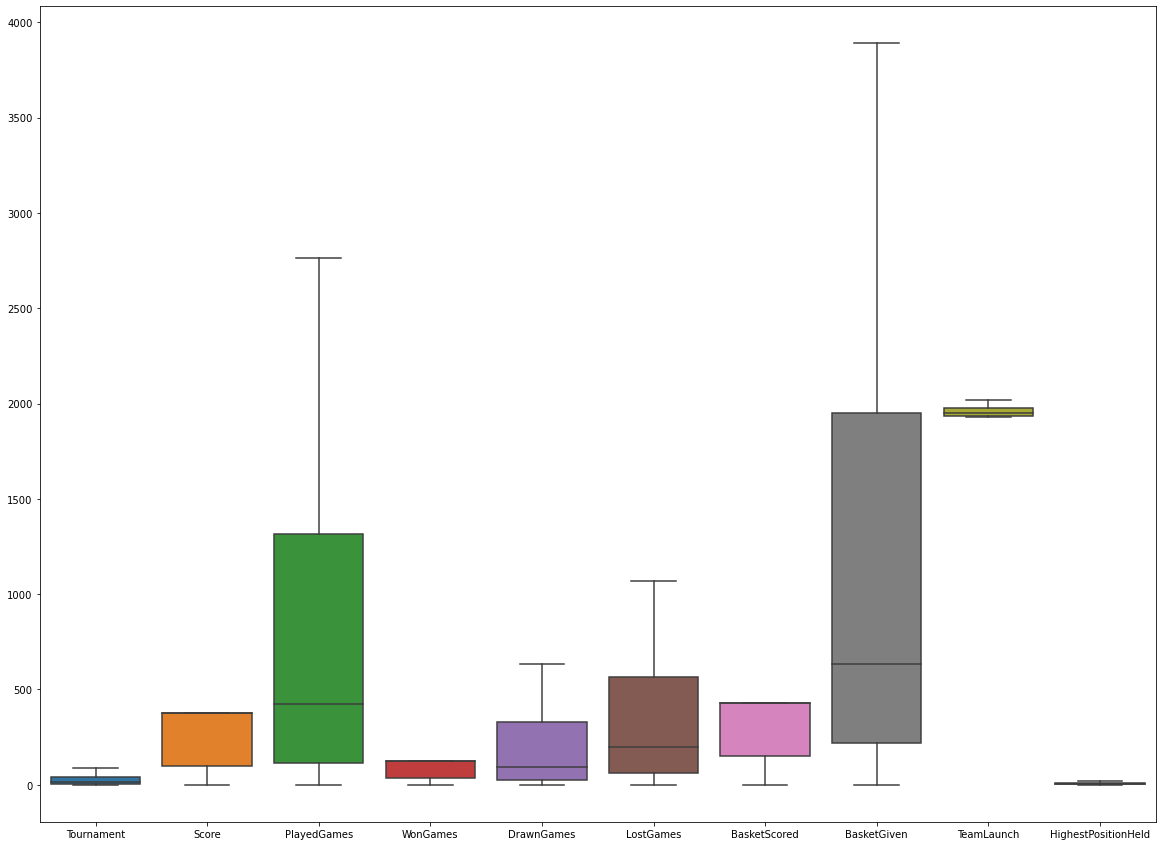

In [135]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

The above box plot shows the post-outlier treatment Graph. Here as we could see there is no outliers present

Adding columns

WinningPercentage: Percentages of games owned by the team.
LoosingPercentage: Percentages of games lost by the team.
WinningRatio: Ratio of games won to that of lost
BasketRatio: Ratio of baskets scored to that of given

A. Determining Winning Percentage

In [217]:
df_win = df['WonGames'] / df['PlayedGames']
df.insert(loc=5, column='WinningPercentage', value=df_win)
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,375.0,2762,123.0,0.044533,552,563,430.0,3140,33,23,1929,1
1,Team 2,86,375.0,2762,123.0,0.044533,573,608,430.0,3114,25,25,1929,1
2,Team 3,80,375.0,2614,123.0,0.047054,598,775,430.0,3309,10,8,1929,1
3,Team 4,82,375.0,2664,123.0,0.046171,616,861,430.0,3469,6,6,1931,1
4,Team 5,86,375.0,2762,123.0,0.044533,633,920,430.0,3700,8,7,1929,1


To see which team performs well in the matches we are adding one more column called winning percentage.
This winning percentage column has the values which we got from the formula below
win='wongames values'/'played games values'

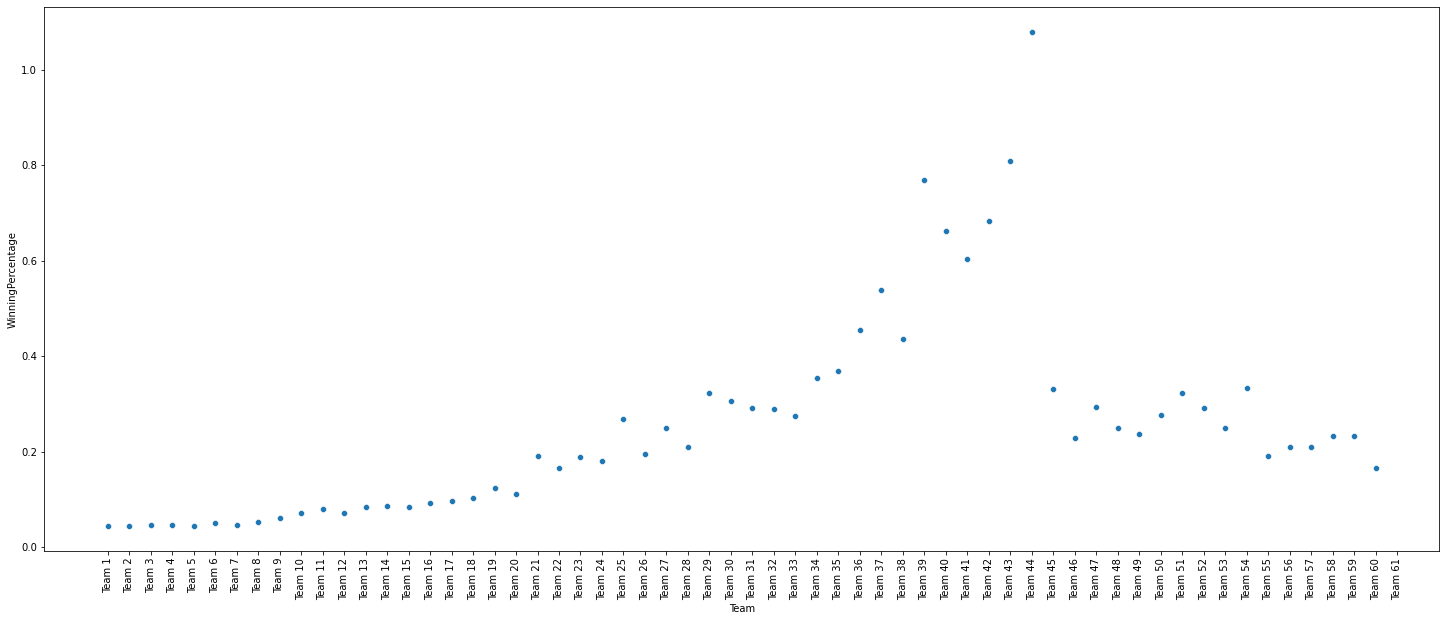

In [185]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='Team', y='WinningPercentage', data=df)
plt.xticks(rotation=90)
plt.show()

On observing the above scatterplot we came to know that Team 44 shows poor performance in all the matches.
Team 1 to Team 10 seems to be performing well.

B. Determining Winning Ratio

In [218]:
df_win_ratio = df['WonGames'] / df['LostGames']
df.insert(loc=9, column='WinningRatio', value=df_win_ratio)
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,BasketScored,WinningRatio,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,375.0,2762,123.0,0.044533,552,563,430.0,0.218472,3140,33,23,1929,1
1,Team 2,86,375.0,2762,123.0,0.044533,573,608,430.0,0.202303,3114,25,25,1929,1
2,Team 3,80,375.0,2614,123.0,0.047054,598,775,430.0,0.158710,3309,10,8,1929,1
3,Team 4,82,375.0,2664,123.0,0.046171,616,861,430.0,0.142857,3469,6,6,1931,1
4,Team 5,86,375.0,2762,123.0,0.044533,633,920,430.0,0.133696,3700,8,7,1929,1


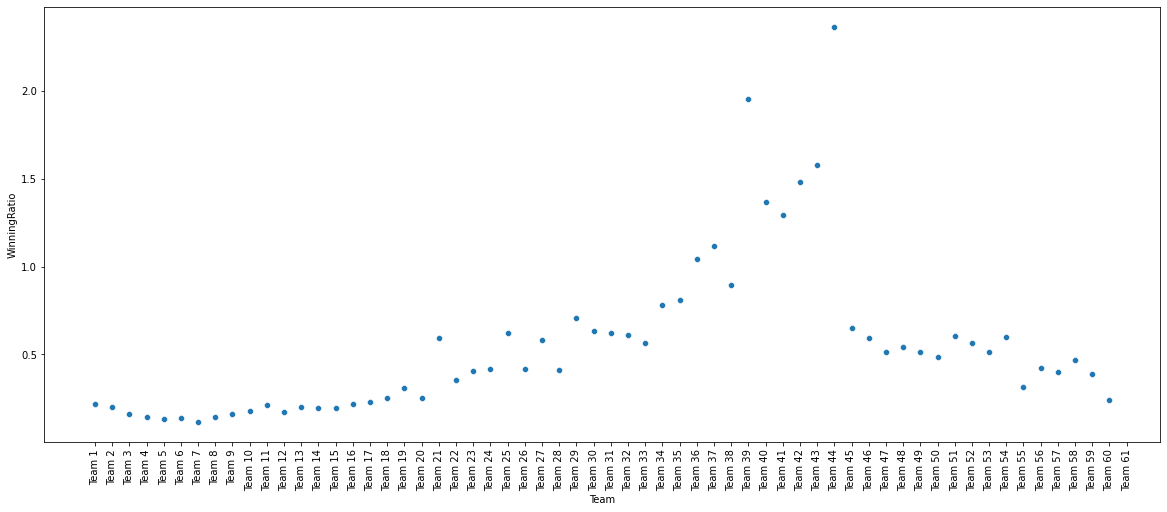

In [188]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Team', y='WinningRatio', data=df)
plt.xticks(rotation=90)
plt.show()

On observing the above scatterplot we came to know that Team 44 shows poor performance in all the matches.
Team 1 to Team 10 seems to be performing well.

C. Determining Tournament count

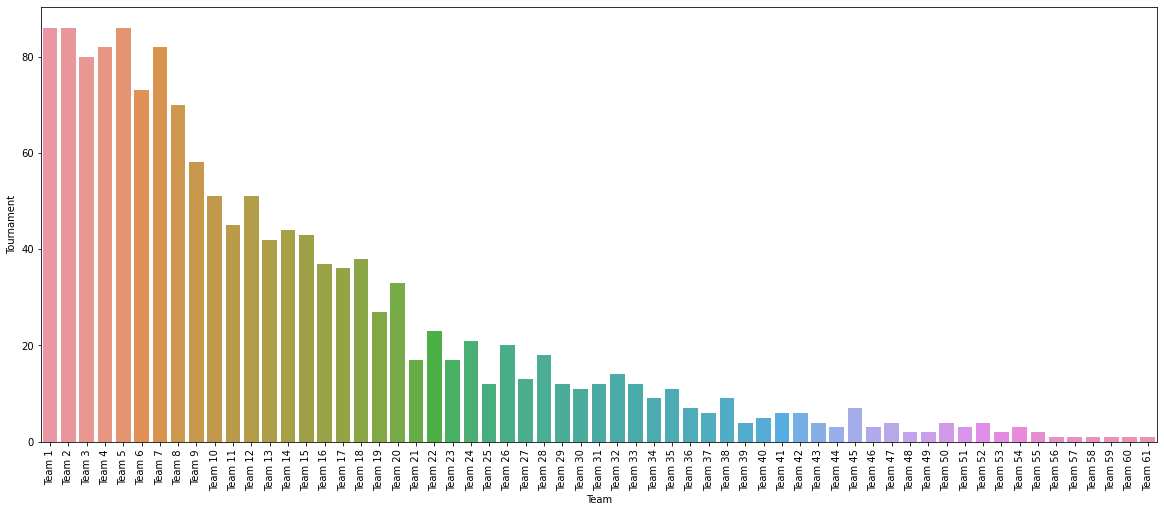

In [190]:
plt.figure(figsize=(20,8))
sns.barplot(df['Team'], df['Tournament'])
plt.xticks(rotation=90)
plt.show()

From the above plot, we can infer that Team 1,2 & 5 have played most of the tournament. 
Team 56 to 61 has played in least number of tournaments.
It is evident that the teams playing most number of tournaments have wither won or lost in counts

D. Determining score of each teams

<AxesSubplot:xlabel='Score', ylabel='Team'>

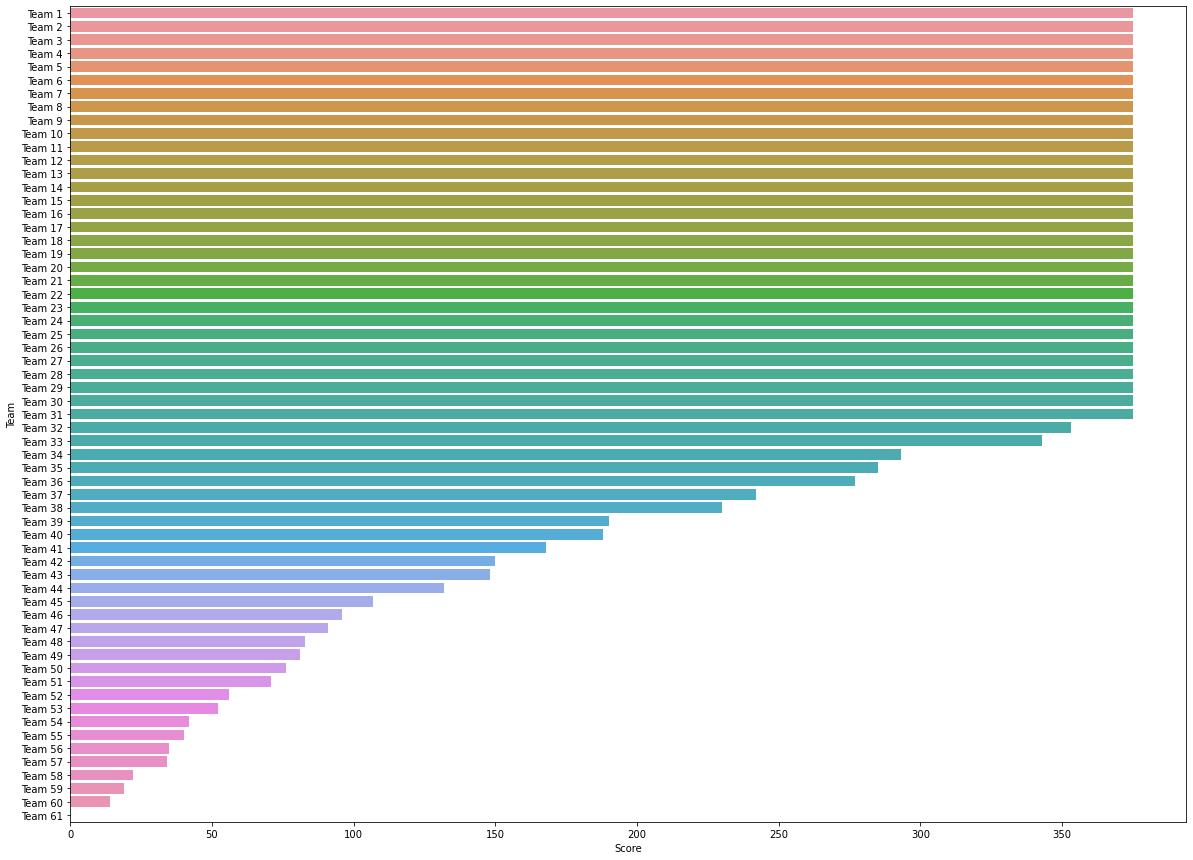

In [124]:
plt.figure(figsize=(20,15))
sns.barplot(df['Score'], df['Team'], orient='h')

-From the above plot, we can infer that Teams 1 to 31 have almost equal scores obtained.
-From team 32 to 61 the scores drop making 
-Team 61 score the least

E. Determining the Tournament Champion

<AxesSubplot:xlabel='TournamentChampion', ylabel='Team'>

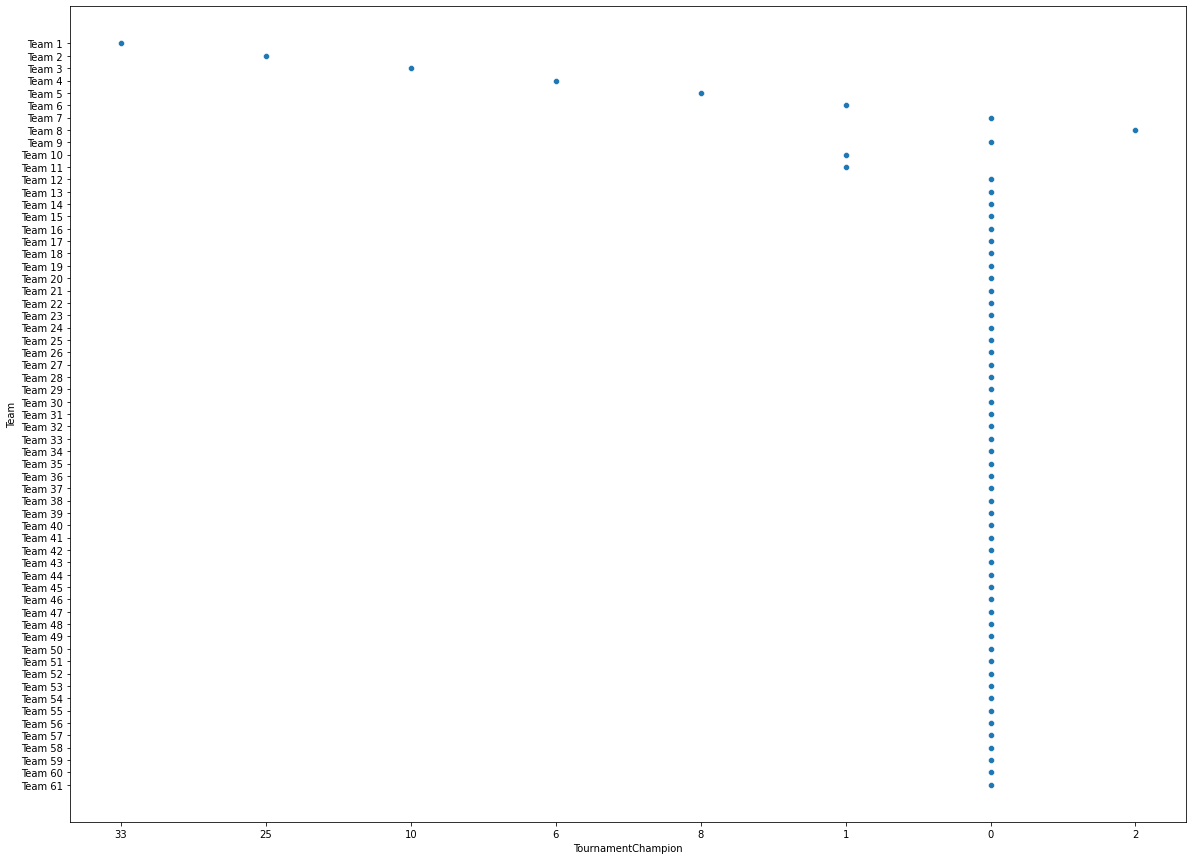

In [203]:
plt.figure(figsize=(20,15))
sns.scatterplot(df['TournamentChampion'], df['Team'])

By using the scatterplot, we can infer that Team 1 has been Tournament champion for almost 33 times followed by Team 2 and Team 3.
It is evident that dealing with Team 1,2 or 3 is a good option for company X

F. Determining Oldest team

In [220]:
df_Number_of_years = 2022-df['TeamLaunch'] 
df.insert(loc=13, column='Age', value=df_Number_of_years )
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,BasketScored,WinningRatio,BasketGiven,TournamentChampion,Runner-up,Age,BasketRatio,TeamLaunch,HighestPositionHeld
0,Team 1,86,375.0,2762,123.0,0.044533,552,563,430.0,0.218472,3140,33,23,93,0.136943,1929,1
1,Team 2,86,375.0,2762,123.0,0.044533,573,608,430.0,0.202303,3114,25,25,93,0.138086,1929,1
2,Team 3,80,375.0,2614,123.0,0.047054,598,775,430.0,0.158710,3309,10,8,93,0.129949,1929,1
3,Team 4,82,375.0,2664,123.0,0.046171,616,861,430.0,0.142857,3469,6,6,91,0.123955,1931,1
4,Team 5,86,375.0,2762,123.0,0.044533,633,920,430.0,0.133696,3700,8,7,93,0.116216,1929,1


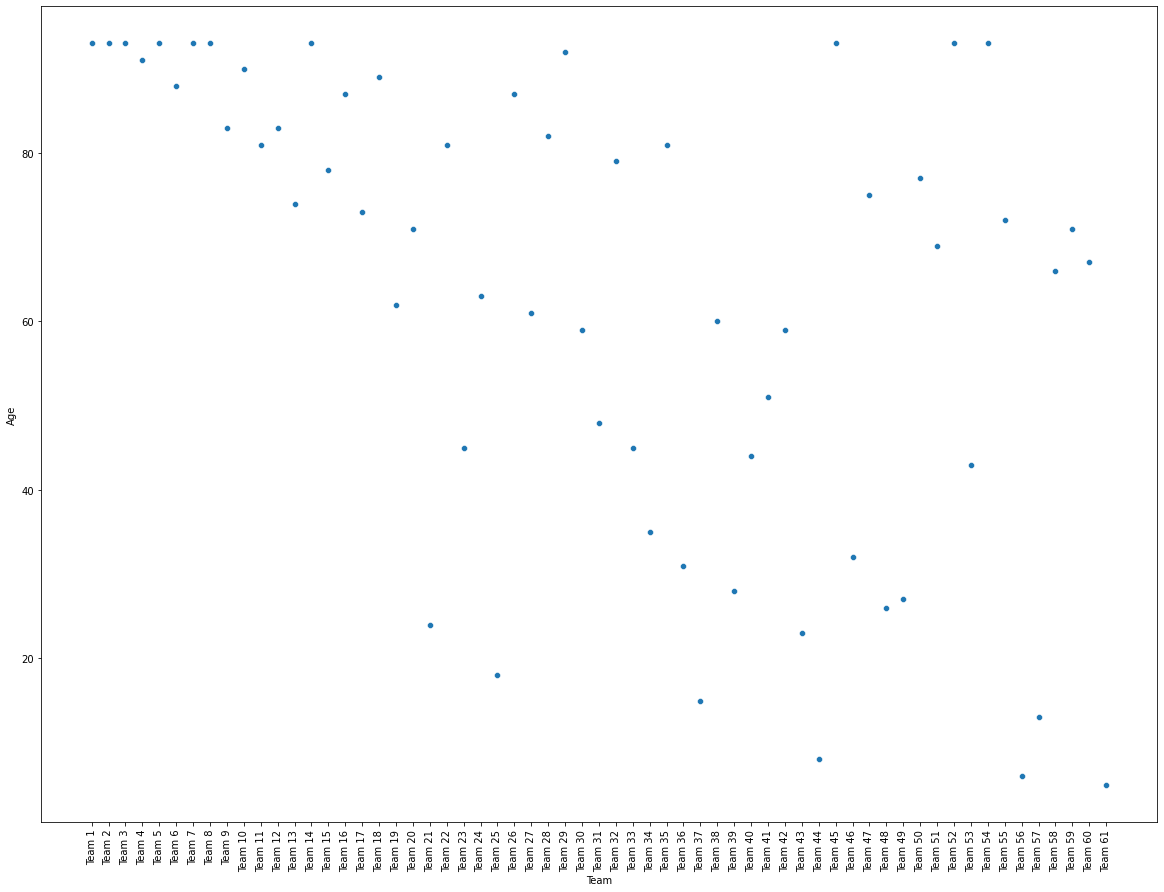

In [224]:
plt.figure(figsize=(20,15))
sns.scatterplot(df.Team,df.Age)
plt.xticks(rotation=90)
plt.show()

By using  the factor of age we are trying to find which team is  the 'Oldest', on analysing this we can get to know about the form of the players, strategies used in the past and other factors which can be used for predicting the team performance.

From the above plot, we can infer that Team 1,2, 3 & 5 are the oldest teams havong age more than 90 years
and the Team 61 is new one having age less than 10 years

The Observation Report for the Company to understand the status of the teams at present which is determined by using the past data given

1. Team 1,2 & 3 played the most tournament matches.

2. Team 1,2 & 3 have been the Tournament champions for more than 30 years which shows that the Team1,2 and 3 are still in the form  and they also had a good amount of experience in the field.

3. On seeing the overall performance of all teams played, we understand some teams are performing very low. By the observations from the plots and graphs above, we found that the Team 7 has very low performance.

4. We found the oldest of the Teams, This factor decides some of the sub-factors for winning the matches.

   sub-factors include:
   1. Form of the players
   2. Experience they had in the field
   3. strategies they used in the past

5. On calculating the winning ratio and winning percentages we observe that Team 1 to 10 have perfromed well and we also found that Team 44 performs in a poor manner.

Recommendations given to the company

1. As the company is planning to invest in the Team which will win in the future. So We recommend the company to invest in Teams   from 1 to 10

2. Among the Teams from 1 to 10 , we would like to recommend the company with the teams Team 1, 2 and 3 as they have played most   number of matches through which we understand they are most experienced in the American League.

3. Since Team 44 has poor performance in almost all the matches, we are recommending the Company X not to invest in Team 44. If done the company has to incurr the loss in future.

# STATISTICS

The following are the ages of 30 customers who ordered an EV scooter from Zen
Automotives

42 44 62 35 20
30 56 20 23 41
55 22 31 27 66
21 18 24 42 25
32 50 31 26 36
39 40 18 36 22

Import necessary libraries

In [6]:
from statistics import mean
from statistics import median
from statistics import mode
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import statistics as st
import random

Creating and storing the given dataset in a dataframe

In [17]:
age=[42,44,62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25,32, 50,31, 26, 36, 39, 40, 18, 36, 22]
df_age=pd.DataFrame(age, columns=['Age'])
df_age.head()

,Age
0,42
1,44
2,62
3,35
4,20


Q1. Compute the mean, median and the mode of the data

In [137]:
mean=df_age.mean()
print('Mean of the data is',mean)

Mean of the data is Age    34.466667
dtype: float64


In [139]:
median=df_age.median()
print('Median of the data is',median)

Median of the data is Age    31.5
dtype: float64


In [140]:
mode=df_age.mode()
print('Mode of the data is',mode)

Mode of the data is    Age
0   18
1   20
2   22
3   31
4   36
5   42


Solution: 
    1. Mean of the data is 34.466667
    2. Median of the data is 31.5
    3. Mode of the data is 18,20,22,31,36,42
Since mean and median is very close, we can infer that there is no much effect on central tendency of the data. 

Q2. Compute the range , variance and standard deviation of customer ages

RANGE

In [142]:
max=df_age.max()

In [143]:
min=df_age.min()

In [174]:
range=max-min
print('The range is', range)

The range is Age    48
dtype: int64


STANDARD DEVIATION

In [147]:
std=df_age.std()
print('The Standard deviation is', std)

The Standard deviation is Age    13.317692
dtype: float64


VARIANCE

In [148]:
variance=(std)**0.5
print('The variance is', variance)

The variance is Age    3.649341
dtype: float64


Solution: 
    1. The range is 48
    2. The variance is 3.649341
    3. The variance is 3.649341

Q3. Find the mean deviation for the data

In [150]:
mean_dev = df_age.mad()
print('The mean deviation is', mean_dev)

The mean deviation is Age    10.764444
dtype: float64


Solution: The mean deviation is 10.764444

Q4. Calculate the Pearson coefficient of skewness and comment on the
skewness of the data

In [69]:
df_age.skew()

Age    0.795716
dtype: float64

In [156]:
Pc = (3*(mean-median))/std
Pc

Age    0.668284
dtype: float64

 Comment : The distribution is
positively skewed , the coefficient is positive

Q5. Count the number of data values that fall within two standard deviations of
the mean. Compare this with the answer from Chebyshev’s Theorem.

In [170]:
1-(1/(mean_dev*2))

Age    0.953551
dtype: float64

In [172]:
round((3/4)*30)

22

In [164]:
rev_std=std*2
rev_std

Age    26.635384
dtype: float64

In [165]:
r1=mean-rev_std
r2=mean+rev_std

In [166]:
r1

Age    7.831283
dtype: float64

In [167]:
r2

Age    61.102051
dtype: float64

In [169]:
data_val=r2-r1
data_val

Age    53.270768
dtype: float64

According to Chebyshev’s Theorem, the number of data values that fall within two standard deviations of the mean is 22. The limits are 7.83 and 61.10

According to Chebyshev’s Theorem, at least 3/4 of the data lie within two standard deviations of the mean, that is, in the interval with endpoints x(bar)±2s for samples and with endpoints μ±2σ for populations.

Q6. Find the three quartiles and the interquartile range (IQR).

In [ ]:
q1=np.percentile(age)

In [160]:
q1= df_age.quantile(0.25)
q3 =df_age.quantile(0.75)
iqr = q3 - q1
print('Q1','=',q1)
print('Q3','=',q3)
print('IQR','=', iqr)

Q1 = Age    23.25
Name: 0.25, dtype: float64
Q3 = Age    41.75
Name: 0.75, dtype: float64
IQR = Age    18.5
dtype: float64


Solution: 
    First quantile =23.25
    Third quantile range =41.75
    Inter quartile range =18.15

Q7. Are there any outliers in the data set ?

<AxesSubplot:>

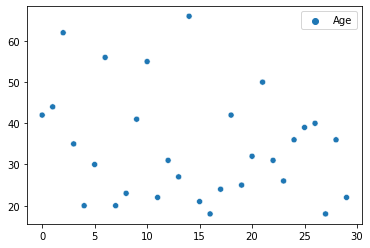

In [29]:
sns.scatterplot(data=df_age)

Q8. Draw a boxplot of the dataset to confirm

<AxesSubplot:>

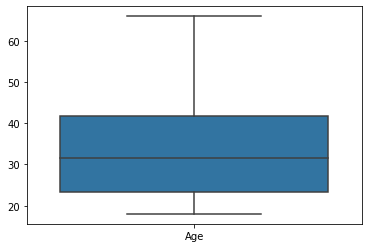

In [12]:
sns.boxplot(data=df_age)

Solution: There are no outliers present in the data

Q9. Find the percentile rank of the datapoint 50

In [30]:
df_age['Percentile Rank'] = df_age.Age.rank(pct = True)
df_age

,Age,Percentile Rank
0,42,0.783333
1,44,0.833333
2,62,0.966667
3,35,0.566667
4,20,0.116667
5,30,0.433333
6,56,0.933333
7,20,0.116667
8,23,0.266667
9,41,0.733333


In [31]:
df_age[df_age['Age']==50]

,Age,Percentile Rank
21,50,0.866667


Solution: Percentile rank for 50th data point is 0.866667

Q11. Create a frequency distribution for the data and visualize it appropriately

In [37]:
df_age.drop(columns='Percentile Rank', inplace=True)

<AxesSubplot:ylabel='Count'>

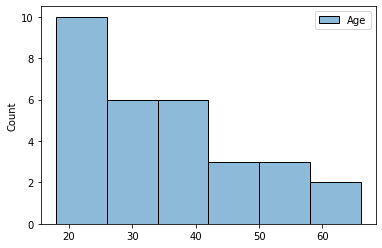

In [38]:
sns.histplot(data=df_age)

Solution: Frequency distribution for the data is right skewed

Q12. Create a probability distribution of the data and visualize it appropriately

<AxesSubplot:ylabel='Density'>

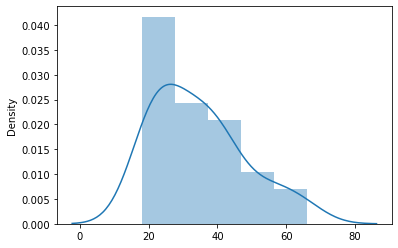

In [40]:
sns.distplot(df_age)

Solution: Probability distribution for the data is right skewed

Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean age of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?

In [74]:
# given population


# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
sample_wr = random.choices(population = age, k = 100)

# print the sample
print('Sample with replacement:', sample_wr)

Sample with replacement: [32, 35, 40, 27, 20, 41, 20, 22, 62, 44, 66, 18, 24, 26, 36, 25, 18, 42, 18, 66, 40, 50, 20, 30, 56, 42, 31, 24, 36, 66, 31, 42, 50, 18, 31, 24, 66, 31, 22, 56, 31, 40, 55, 23, 56, 42, 62, 56, 23, 36, 41, 66, 18, 32, 66, 42, 20, 44, 40, 36, 35, 66, 20, 44, 18, 20, 22, 22, 18, 41, 62, 35, 20, 18, 22, 66, 42, 41, 56, 66, 31, 18, 42, 44, 40, 31, 42, 35, 25, 26, 42, 31, 40, 20, 36, 25, 39, 23, 21, 22]


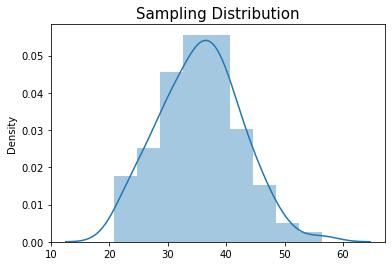

In [75]:
# create a sampling distribution from the above population with replacement
# first we define the number of samples to be drawn 
n_samples=100

# create an empty list to store the means of each sample
sample_means = []

# create a for loop to get the sample means array
for i in range(n_samples):
    # generates a random sample of size 100 from the population array
    sample = np.random.choice(sample_wr, size=5, replace=True)
        
    # calculate the mean of the sample data
    sample_mean = np.mean(sample)
        
    # append the mean to the list
    sample_means.append(sample_mean) 
    
# plot the distribution of the sample means 
sns.distplot(sample_means)

# give the graph a title
plt.title("Sampling Distribution", fontsize=15)

# display the graph
plt.show()

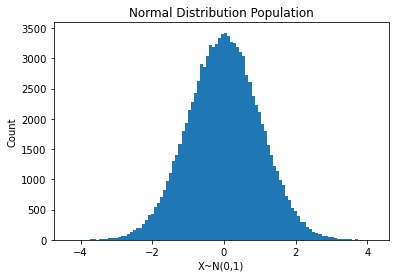

In [89]:
# import the required function
from scipy.stats import norm

# set the seed for reproducibility
np.random.seed(1)
# create a normal distribution population of size 100
normal_pop = norm.rvs(0, 1, size=100000)
# visualize the normal distribution
plt.hist(normal_pop, 100)
plt.title("Normal Distribution Population")
plt.xlabel("X~N(0,1)")
plt.ylabel("Count")
plt.show()

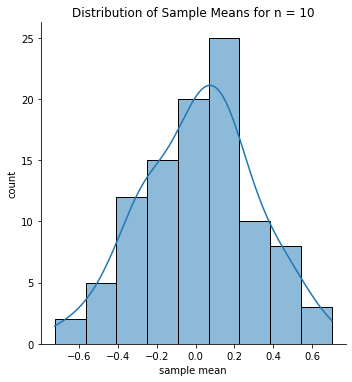

In [79]:
np.random.seed(1)
# set the sample size to 10
n = 10
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(100):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

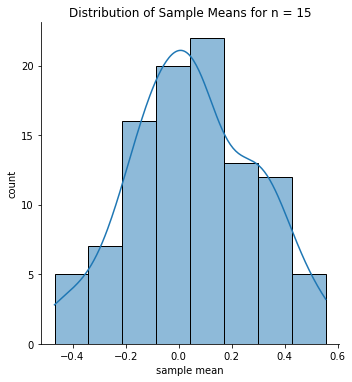

In [80]:
np.random.seed(1)
# set the sample size to 15
n = 15
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(100):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

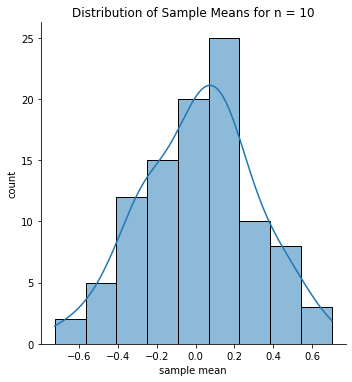

In [81]:
np.random.seed(1)
# set the sample size to 20
n = 20
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(100):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

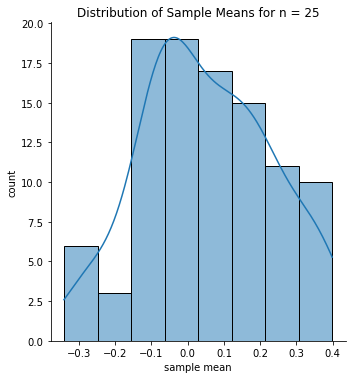

In [82]:
np.random.seed(1)
# set the sample size to 25
n = 25
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(100):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

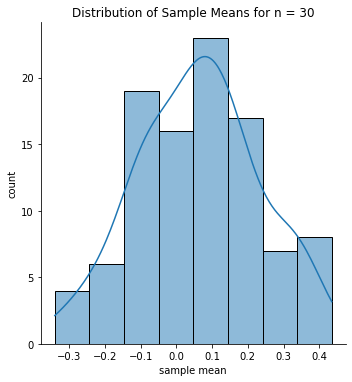

In [83]:
np.random.seed(1)
# set the sample size to 30
n = 30
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(100):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

In [ ]:
Let's see if CLT works if the population distribution is Exponential Distribution (which again is clearly not Normal)

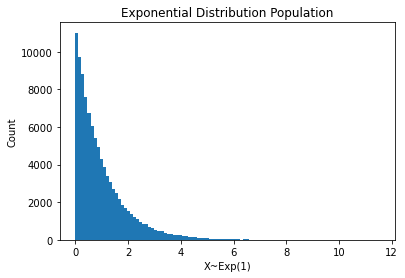

In [86]:
# import the required function
from scipy.stats import expon

# set the seed for reproducibility
np.random.seed(1)
# create a exponential distribution population of size 100000
exp_pop = expon.rvs(size=100000)
# visualize the exponential distribution
plt.hist(exp_pop, 100)
plt.title("Exponential Distribution Population")
plt.xlabel("X~Exp(1)")
plt.ylabel("Count")
plt.show()

Solution:
We have tried different distributions to simulate the fundamental idea of CLT. 
We can see that no matter what the shape of the population distribution is, the plot of samples means approximately tends to normal distribution as sample size increases.

Q14. Treat this dataset as a binomial distribution where p is the probability
that a person ordering an EV is above 50 years age. What is the probability
that out of a random sample of 10 buyers exactly 6 are above 50 years of
age?

In [103]:
p=0.6
n=10
k=6
binomial = stats.binom.pmf(k,n,p)
print('Probability that exactly 6 are above 50 years of age is',binomial )

Probability that exactly 6 are above 50 years of age is 0.2508226559999998


Q15. A study claims that 10% of all customers for an EV scooter are above 50
years of age. Using the Normal approximation of a Binomial distribution, find
the probability that in a random sample of 300 prospective customers exactly
25 will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [114]:
prob = stats.binom.pmf(k = 25, n = 300, p = 0.10)

# use 'round()' to round-off the value to 2 digits
prob = round(prob, 2)
print('The probability that customers exactly 25 will be above 50 years of age is', prob)

The probability that customers exactly 25 will be above 50 years of age is 0.05


Q16. Compute a 95% Confidence Interval for the true mean age of the
population of EV scooter buyers for the dataset using appropriate distribution.(
State reasons as to why did you use a z or t distribution)

In [121]:
stats.t.interval(alpha=0.95, df=len(age)-1,loc=np.mean(age),scale=1)

(32.421437024533965, 36.51189630879937)

If the population standard deviation is known, and the size of the sample is less than or equal to 30, T-test is recommended.

Q17. A data scientist wants to estimate with 95% confidence the proportion of
people who own an EV in the population. A recent study showed that 20% of
people interviewed had an EV. The data scientist wants to be accurate within
2% of the true proportion. Find the minimum sample size necessary.

In [111]:
import scipy.stats
# for calculation of Z alpha/2
z = scipy.stats.norm.ppf(.025)  #z alpha/2
E = 0.02 #E-error
P = 0.2 #P-probability of occurance
Q = 0.8 #Q=(1-P)
n = (z*z*P*Q)/(E*E) #minimum sample size
print(round(n))

1537


Solution: The minimum sample size is 1537

Q18. The same data scientist wants to estimate the proportion of executives
who own an EV. She wants to be 90% confident and accurate within 5% of
true proportion. Find the minimum sample size necessary.

In [175]:
import scipy.stats
# for calculation of Z alpha/2
z = scipy.stats.norm.ppf(.05)  #z alpha/2
E = 0.05 #E-error
P = 0.5 #P-probability of occurance
Q = 0.5 #Q=(1-P)
n = (z*z*P*Q)/(E*E) #minimum sample size
print(round(n))

271


Solution: The minimum sample size is 271

Q19. A researcher claims that currently 20% of the population are owning
EVs. Test his claim with an alpha =0.05 if out of a random sample of 30
two-wheeler owners only 5 own an EV.

In [58]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import   ttest_1samp

In [60]:
n=list(np.arange(1,30))

In [63]:
mydata = random.sample(n,5)
mydata

[26, 6, 23, 3, 21]

Step 1: Define null and alternative hypotheses


𝐻0:  𝜇=20%
𝐻𝐴:  𝜇≠20%

In [ ]:
Step 2: Decide the significance level

In [ ]:
Here we select  𝛼= 0.05

In [62]:
print("The sample size for this problem is",len(mydata))

The sample size for this problem is 5


In [ ]:
Step 3: Identify the test statistic

In [ ]:
We do not know the population standard deviation and n = 30. So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇
test statistic.

In [ ]:
Step 4: Calculate the p - value and test statistic

In [ ]:
scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations 
and the expected value in the null hypothesis. 
This function returns t statistic and the two-tailed p value.

In [64]:
# one sample t-test
# null hypothesis: expected value = 5
t_statistic, p_value = ttest_1samp(mydata, 5)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 2.295276167028018 p value: 0.08337128911743683 


In [67]:
# one sample t-test
# null hypothesis: expected value = 144
t_statistic, p_value = ttest_1samp(mydata, 5)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 2.295276167028018 p value: 0.08337128911743683 


In [68]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.08337128911743683


In this example, p value is 0.08337128911743683 and it is greater than 5% level of significance

So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.
a. Show why you support Zen’s claim using the P-value obtained.
b. After more complaints you decide to test the variability of the mileage on
the highway. On questioning Zen’s quality control engineer , you find
that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for
variance/standard deviation]
c. Write a summary of results and the action that Zen must take to remedy
the complaints.
d. What is your position on performing the test for variability along with the
test for means?

In [53]:
# import the required function
from scipy.stats import norm

# set the values of sample mean and sigma
x_bar, sigma = 91.3, 7.2

# set the value of sample size
n = 40

# construct the confidence interval
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([89.07, 93.53])

STEP-1 - Deciding the hypothesis for testing the hypothesis 

𝐻0:𝜇=96
 
against the alternative hypothesis

𝐻𝑎:𝜇≠96

STEP-2 - The next step is to find the test statistic

In [22]:
# set the values of population mean and standard deviation to 40 and 14.4 respectively
mu, sigma = 40, 14.4

# set the value sample mean to 580
x_bar = 91.3

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(40))
test_stat

22.531228328699704

STEP-3 - Let's use the rejection region approach for two-tailed test

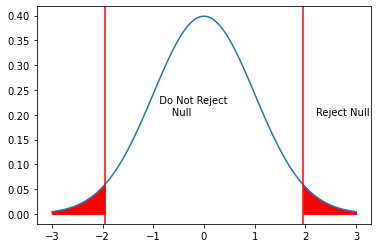

In [50]:
#TWO TAIL TEST
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)
# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-3, 3, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val1, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val1, 3, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.axvline(x = critical_val2, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(-3, critical_val2, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (2.2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n      Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

As our test statistic (22.53) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence

STEP-4 - Deciding the hypothesis for testing the second hypothesis

𝐻0:𝜇=96


𝐻𝑎:𝜇<96

STEP-5 - Let's use the rejection region approach for one-tailed test
In the given example, the Z test statistic follows a standard normal distribution. The Z values lying in the left end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that give an area of  𝛼
to both the left end.

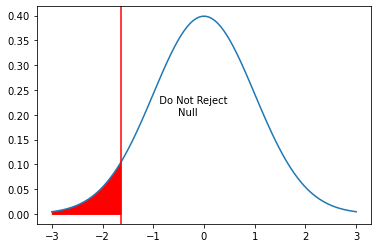

In [51]:
#ONE TAIL TEST
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-3, 3, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(-3, critical_val, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

As our test statistic (22.53) lies in the rejection region, we can reject the null hypothesis. Thus, we have strong statistical evidence

Q21. Write a report comparing and contrasting Descriptive vs Inferential
Statistics in about 200-500 words and how each helps to get more insight into
the data at hand.

Descriptive statistics:
It seeks to describe the data, but do not attempt to make inferences from the sample to the whole population.
It helps us to Summarize, organize and present the data in a meaningful way.
statistics that describe the data in some way. 
Descriptive statistics is the term given to the analysis of data that helps to summarize or show data in a meaningful manner. Descriptive statistics allows for important patterns to emerge from this data.
Descriptive statistics is key because it allows us to present large amounts of raw data in a meaningful way. This enables a better interpretation of data. 
There are usually two types of descriptive statistics:
(i) Measures Of Spread
Measures of spread describe how spread out the distribution is for a particular group of data. 
Measures of spread give an idea of the range and variation in a given set of data. 
This helps develop a better understanding of the nature of the data. 
Measures of spread include things like variance, standard deviation, range, and quartiles.
(ii) Measures Of Central Tendency
These are statistical measures that describe the central position of a frequency distribution for a large amount of raw data.
These measures include many different statistics such as mean, mode and median.
Different measures of central tendency are more appropriate to use under different conditions.

Inferential statistics 
It deals with m aking inferences about a population from a sample.
It is used for Conclusion and prediction of data.
Inferential statistics are statistical techniques that allow us to use the samples to make generalizations about the population data. 
A process called sampling is used to make sure the sample chosen represents the population as closely as possible. 
Inferential statistics are used extensively in data science.

Inferential statistics are used because samples cannot represent the population with complete accuracy 
and analysis on sample data is therefore prone to “sampling error”. 
Inferential statistics uses two methods. These include:
(a) The estimation of the parameters (which are standard parameters like mean, mode, variance, etc.)

(b) The testing of the statistical hypothesis